<a href="https://colab.research.google.com/github/PhattarasornTeppabut/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'ภัทรสร เทพบุตร'
ID = '623020531-5'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:14


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


In [6]:
Data.shape    #ดูขนาดของข้อมูลที่นำเข้ามาว่ามี data กี่ตัว เเละมีกี่ dimensions

(10000, 32)

#Clustering หรือการจัดกลุ่มข้อมูล

   เป็นวิธีที่ machine จะหาความสัมพันธ์ของข้อมูล เพื่อแบ่งข้อมูลออกเป็นกลุ่มๆ

####ทำโดยการใช้ K-Mean
การใช้ K-Means เราต้องกำหนดว่าเราต้องการจะ Cluster ข้อมูลเป็นกี่กลุ่ม

###Import

นำเข้าข้อมูล

In [12]:
from sklearn.cluster import KMeans 

### Difine

กำหนดกลุ่ม clusters เป็น 3 กลุ่ม

In [13]:
kmeans = KMeans( n_clusters=3,random_state=2021) # ตั้งจุดcenter   K=3

### Fit- transform

คำนวณหาจุด cluster centers ด้วย fit

In [9]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

เเสดง จุด cluster centers ที่คำนวณออกมาได้

In [10]:
kmeans.cluster_centers_

array([[ 1.27868004e+00,  2.70365000e+00, -2.19201288e+00,
         1.52253147e+00,  1.33335715e+00, -1.64449892e+00,
         2.69286360e+00,  2.12449263e+00,  3.99378693e+00,
        -2.26694150e+00,  6.76165699e-01, -4.08361205e-01,
        -1.34832070e+00, -1.14303399e+00, -3.90911575e+00,
        -4.43701633e-01, -8.14545742e-02,  1.74558265e+00,
         1.48564733e+00, -1.84455389e+00,  1.06833959e+00,
        -9.77326789e-01, -4.57707690e-01, -2.24550198e+00,
         3.93807181e+00, -3.02895878e+00,  5.53800147e-01,
         1.98129143e+00,  1.33574063e+00,  2.37214026e+00,
         5.40730000e+00,  1.38607013e+01],
       [ 2.36833390e+00, -3.55685420e+00, -3.03659164e-01,
         4.41739366e+00, -1.66876977e+00,  6.09908118e+00,
         4.70211125e+00, -1.93109228e+00, -2.95890055e+00,
        -2.13770101e+00,  2.53919180e+00, -4.87153224e-01,
         1.47141565e+00,  2.80878036e+00,  5.94916152e+00,
         1.84589372e+00, -3.06750741e-01,  3.08389661e+00,
         5.09

### ทดสอบการจัดกลุ่มของ Data

In [11]:
y = kmeans.predict(Data)
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

##**PCA**

เป็นการวิธีการลด Dimension ของข้อมูล โดยจะรักษา Information ไว้ให้เยอะที่สุด

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [22]:
from matplotlib import pyplot as plt

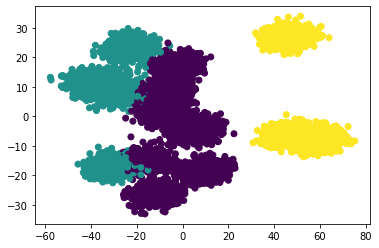

In [23]:
kmeans = KMeans(n_clusters=3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

### SSE    

คือ ความไม่ใกล้เคียงกับจุดศูนย์กลางมากน้อยเท่าไหน

ค่า SSE จะทำให้เกิดความโค้งที่เรียบขึ้นเรื่อย ๆ

In [28]:
kmeans.cluster_centers_

array([[ 1.27868004e+00,  2.70365000e+00, -2.19201288e+00,
         1.52253147e+00,  1.33335715e+00, -1.64449892e+00,
         2.69286360e+00,  2.12449263e+00,  3.99378693e+00,
        -2.26694150e+00,  6.76165699e-01, -4.08361205e-01,
        -1.34832070e+00, -1.14303399e+00, -3.90911575e+00,
        -4.43701633e-01, -8.14545742e-02,  1.74558265e+00,
         1.48564733e+00, -1.84455389e+00,  1.06833959e+00,
        -9.77326789e-01, -4.57707690e-01, -2.24550198e+00,
         3.93807181e+00, -3.02895878e+00,  5.53800147e-01,
         1.98129143e+00,  1.33574063e+00,  2.37214026e+00,
         5.40730000e+00,  1.38607013e+01],
       [ 2.36833390e+00, -3.55685420e+00, -3.03659164e-01,
         4.41739366e+00, -1.66876977e+00,  6.09908118e+00,
         4.70211125e+00, -1.93109228e+00, -2.95890055e+00,
        -2.13770101e+00,  2.53919180e+00, -4.87153224e-01,
         1.47141565e+00,  2.80878036e+00,  5.94916152e+00,
         1.84589372e+00, -3.06750741e-01,  3.08389661e+00,
         5.09

In [26]:
new_cluster_center = pca.transform(kmeans.cluster_centers_)

In [27]:
new_cluster_center

array([[ -4.37561716,  -5.59974205],
       [-30.49610198,   6.60128564],
       [ 50.95113979,   4.22465234]])

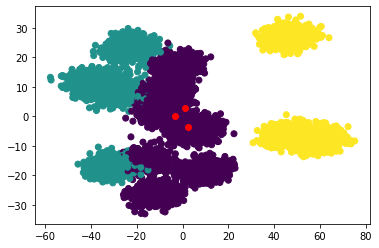

In [24]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

ทำการหาค่า k ว่าควรจะเป็นเท่าไหร่ โดยการใช้ Elbow Method 

## Elbow Method 

การค้นหาจำนวนคลัสเตอร์ที่เหมาะสมที่สุดสำหรับชุดข้อมูล

 elbow เป็นกราฟที่คล้ายรูปศอก

In [29]:
kmeans.inertia_       # SSE 

10192922.646103252

In [30]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [33]:
SSE

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

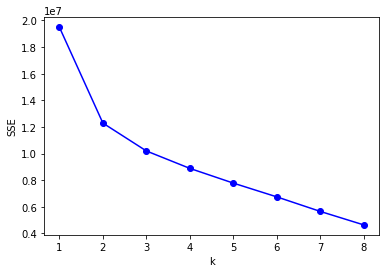

In [34]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')    # ตรงศอกเป็น 2  ดังนั้นค่าK จึงเท่ากับ 2
plt.xlabel('k')
plt.ylabel('SSE');

จุดที่เหมาะสมของจำนวน Clusters คือจุดที่กราฟมีลักษณะ “หัก” ที่สุด ดังนั้นจากคำนวณหาจำนวน Clusters ที่เหมาะสมที่สุด คือ 2

###### Silhouette coefficient 

เป็นค่าเป็นที่ใช้วัดว่า Instance นั้น มันเหมือนกับ Cluster ที่มันอยู่มากน้อยแค่ไหน

**ข้อควรระวัง** Silhouette coefficient ไม่สามารถคิดข้อมูลที่มีกลุ่มเดียวได้

In [35]:
from sklearn import metrics

In [36]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k,random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

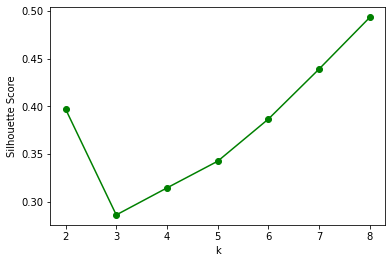

In [37]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')   #จากกราฟพบว่าจุดที่ดีที่สุด คือ K= 8
plt.xlabel('k')
plt.ylabel('Silhouette Score');

###ลด Dimension ของข้อมูลเหลือ 2 มิติ

###### ลด Dimension ของข้อมูล

###### ตรวจสอบว่า ระหว่าง colums มี correlation กันมากน้อยเเค่ไหน 

In [38]:
corr = np.corrcoef(Data.to_numpy().T)

In [39]:
corr.shape

(32, 32)

In [40]:
corr

array([[ 1.        , -0.03522889,  0.06557524, ...,  0.41074998,
        -0.03522889,  0.41074998],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.06557524,  0.26280354,  1.        , ..., -0.01992461,
         0.26280354, -0.01992461],
       ...,
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ]])

In [41]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

เนื่องจากรันแล้วพบว่า ไม่มีผลรันออกมา นั่นแปลว่า ข้อมูลนี้ไม่มีความสัมพันธ์กัน

####MDS

คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ

In [42]:
from sklearn.manifold import MDS

In [43]:
mds = MDS(n_components=2)

In [47]:
new_mds = mds.fit_transform(Data)

In [51]:
kmeans_2 = KMeans(n_clusters=3,random_state=2021)
kmeans_2.fit(Data)
g = kmeans_2.predict(Data)

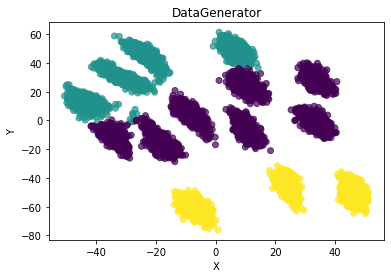

In [52]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

#### เปรียบเทียบ ระหว่างข้อ 2 กับ ข้อ 3
    

ข้อ 2
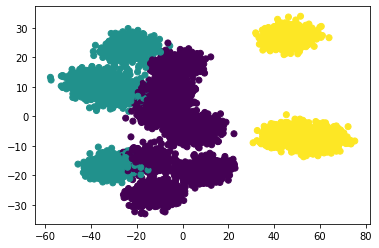

ข้อ 3
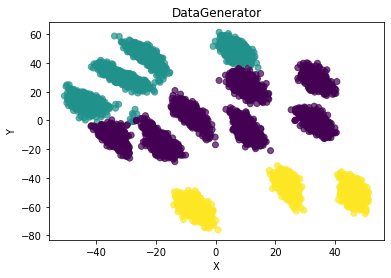

จะเห็นว่ามีการแตกต่างกัน คือในกราฟของข้อที่ 3 จะมีระยะห่างเพิ่มมากขึ้น นั่นคือ มีการกระจายเพิ่มมากขึ้น และมีทิสทางที่เปลี่ยนไป